<h2>Data Analysis & Visualization - CA1</h2>

<h5>Data Selection</h5>

<h7>The Dataset has been sourced from - https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?rvi=1</h7>


In [116]:
import os
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr


In [117]:
cwd = os.getcwd()
os.chdir("C:/Users/David/Documents/DKIT/Y4/DAV/DAV-CA1/DAV-CA1")
data = pd.read_csv("vw.csv")
print(data.isnull().sum())
print(data)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
        model  year  price transmission  mileage fuelType  tax   mpg  \
0       T-Roc  2019  25000    Automatic    13904   Diesel  145  49.6   
1       T-Roc  2019  26883    Automatic     4562   Diesel  145  49.6   
2       T-Roc  2019  20000       Manual     7414   Diesel  145  50.4   
3       T-Roc  2019  33492    Automatic     4825   Petrol  145  32.5   
4       T-Roc  2019  22900    Semi-Auto     6500   Petrol  150  39.8   
...       ...   ...    ...          ...      ...      ...  ...   ...   
15152     Eos  2012   5990       Manual    74000   Diesel  125  58.9   
15153     Fox  2008   1799       Manual    88102   Petrol  145  46.3   
15154     Fox  2009   1590       Manual    70000   Petrol  200  42.0   
15155     Fox  2006   1250       Manual    82704   Petrol  150  46.3   
15156     Fox  2007   2295       

<h5>Imputation Of Missing Data & Cleaning</h5>
If your data is not complete you will need to infer values to complete the dataset.

In [118]:
print("Before --------------------------")
print(data.isnull().sum())

data.dropna(subset=['model'], inplace=True)

imputers = {
    'price': SimpleImputer(strategy='median'),
    'year': SimpleImputer(strategy='most_frequent'),
    'transmission': SimpleImputer(strategy='most_frequent'),
    'mileage': SimpleImputer(strategy='median'),
    'fuelType': SimpleImputer(strategy='most_frequent'),
    'tax': SimpleImputer(strategy='mean'),
    'mpg': KNNImputer(n_neighbors=5),
    'engineSize': KNNImputer(n_neighbors=5)
}

for col, imputer in imputers.items():
    if col == 'model':
        data[col]
    else:
        mask = data[col] == 0
        data[col][mask] = np.nan
        imputed_data = imputer.fit_transform(data[col].values.reshape(-1, 1))
        data[col] = imputed_data.squeeze()

print("After --------------------------")
print(data.isnull().sum())

print("Data --------------------------")
print(data)


Before --------------------------
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
After --------------------------
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
Data --------------------------
        model  year    price transmission  mileage fuelType    tax   mpg  \
0       T-Roc  2019  25000.0    Automatic  13904.0   Diesel  145.0  49.6   
1       T-Roc  2019  26883.0    Automatic   4562.0   Diesel  145.0  49.6   
2       T-Roc  2019  20000.0       Manual   7414.0   Diesel  145.0  50.4   
3       T-Roc  2019  33492.0    Automatic   4825.0   Petrol  145.0  32.5   
4       T-Roc  2019  22900.0    Semi-Auto   6500.0   Petrol  150.0  39.8   
...       ...   ...      ...          ...      ...      ...    ...   ...   
15152     Eos  2012

C:\Users\David\AppData\Local\Temp\ipykernel_25576\226694619.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][mask] = np.nan
C:\Users\David\AppData\Local\Temp\ipykernel_25576\226694619.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][mask] = np.nan
C:\Users\David\AppData\Local\Temp\ipykernel_25576\226694619.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][mask] = np.nan
C:\Users\David\AppData\Lo

In [119]:
print(data)

        model  year    price transmission  mileage fuelType    tax   mpg  \
0       T-Roc  2019  25000.0    Automatic  13904.0   Diesel  145.0  49.6   
1       T-Roc  2019  26883.0    Automatic   4562.0   Diesel  145.0  49.6   
2       T-Roc  2019  20000.0       Manual   7414.0   Diesel  145.0  50.4   
3       T-Roc  2019  33492.0    Automatic   4825.0   Petrol  145.0  32.5   
4       T-Roc  2019  22900.0    Semi-Auto   6500.0   Petrol  150.0  39.8   
...       ...   ...      ...          ...      ...      ...    ...   ...   
15152     Eos  2012   5990.0       Manual  74000.0   Diesel  125.0  58.9   
15153     Fox  2008   1799.0       Manual  88102.0   Petrol  145.0  46.3   
15154     Fox  2009   1590.0       Manual  70000.0   Petrol  200.0  42.0   
15155     Fox  2006   1250.0       Manual  82704.0   Petrol  150.0  46.3   
15156     Fox  2007   2295.0       Manual  74000.0   Petrol  145.0  46.3   

       engineSize  
0             2.0  
1             2.0  
2             2.0  
3      

<h5>Multivariate Analysis</h5>
Analyse and report on the structure of the data. Decide what are the most important
variables and what should be excluded from the index.

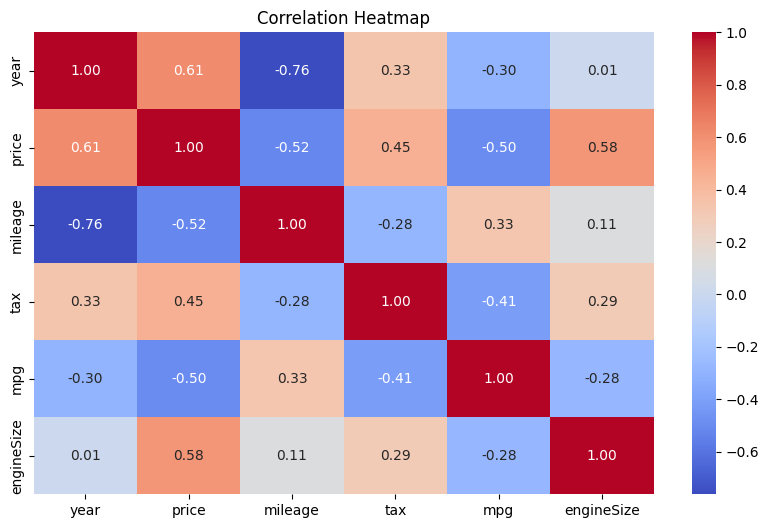

Dependent Variable (DV): price
Independent Variables (IVs): ['year', 'mileage', 'tax', 'mpg', 'engineSize']


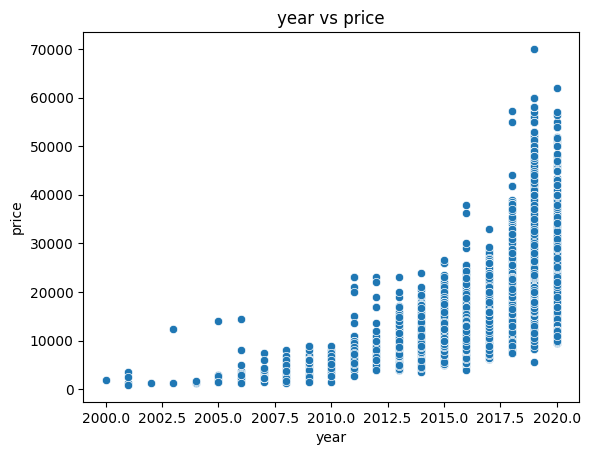

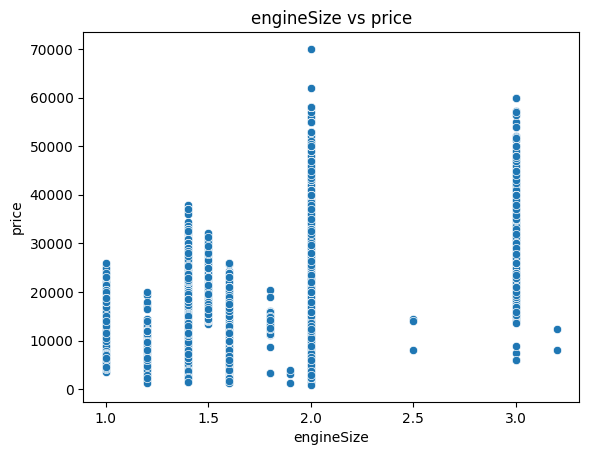

In [123]:
df = pd.DataFrame(data)
df = df.drop(['model'], axis=1)
df = df.drop(['transmission'], axis=1)
df = df.drop(['fuelType'], axis=1)

# 1. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 2. Determining DV and IVs
DV = 'price'
IVs = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

print("Dependent Variable (DV):", DV)
print("Independent Variables (IVs):", IVs)

# 3. Plotting
plt.figure()
sns.scatterplot(data=df, x='year', y='price')
plt.title(f'year vs price')
plt.show()

plt.figure()
sns.scatterplot(data=df, x='engineSize', y='price')
plt.title(f'engineSize vs price')
plt.show()

plt.figure()
sns.scatterplot(data=df, x='tax', y='price')
plt.title(f'tax vs price')
plt.show()

plt.figure()
sns.scatterplot(data=df, x='mpg', y='price')
plt.title(f'mpg vs price')
plt.show()

In [121]:
# 4. Pearson correlation and p-value
correlations = {}
p_values = {}
for col in df.columns:
    if df[col].dtype != 'object' and col != 'price':
        corr, p_val = pearsonr(df[col], df['price'])
        correlations[col] = corr
        p_values[col] = p_val

print("Correlations:")
for col, corr in correlations.items():
    print(f"{col}: {corr:.2f}")

print("\nP-values:")
for col, p_val in p_values.items():
    print(f"{col}: {p_val:.4f}")

# 5. Determining what to drop
df = df.drop(['mileage'], axis=1)

Correlations:
year: 0.61
mileage: -0.52
tax: 0.45
mpg: -0.50
engineSize: 0.58

P-values:
year: 0.0000
mileage: 0.0000
tax: 0.0000
mpg: 0.0000
engineSize: 0.0000


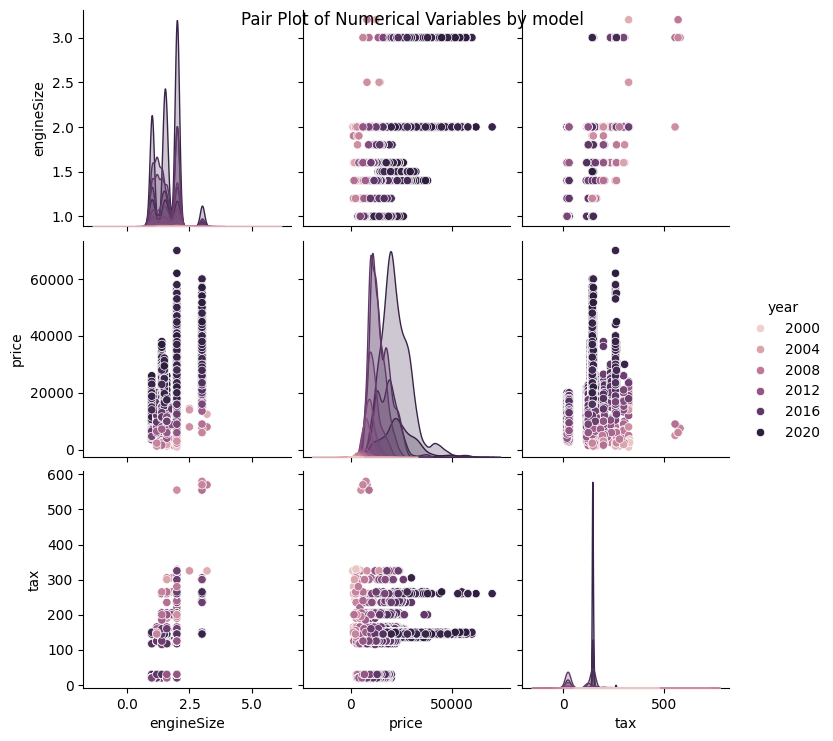

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


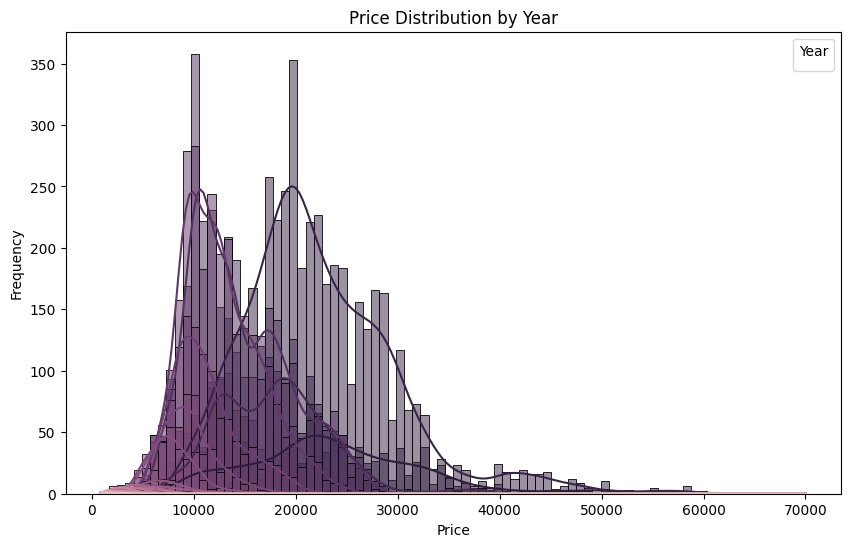

In [122]:
sns.pairplot(df, vars=['engineSize', 'price', 'tax'], hue='year')
plt.suptitle('Pair Plot of Numerical Variables by model')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='year', kde=True)
plt.title('Price Distribution by Year')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Year', loc='upper right')
plt.show()

PCA

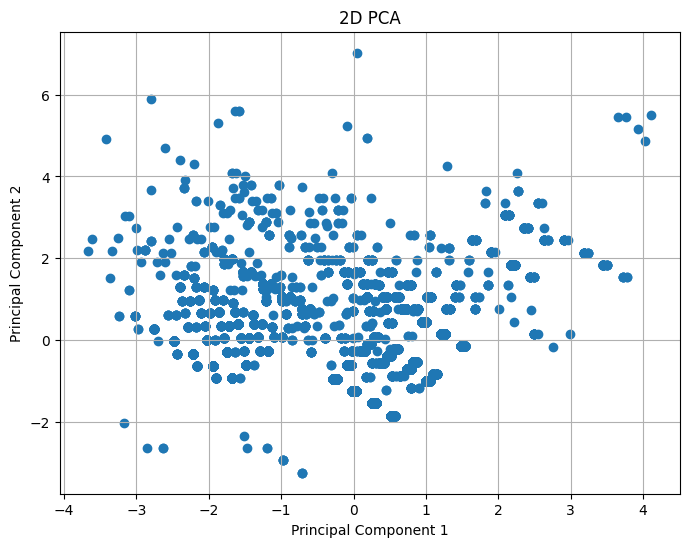

In [87]:
df = pd.DataFrame(data)

features = ['year', 'tax', 'engineSize']

x = df.loc[:, features].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, df[['price']]], axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(finalDf['PC1'], finalDf['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.grid(True)
plt.show()

Linear Regression

In [88]:
df = pd.DataFrame(data)

X = df[['price', 'tax', 'mpg', 'engineSize']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.9265930319544147
R-squared (R2) Score: 0.5532623537308408


Cluster Analysis

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


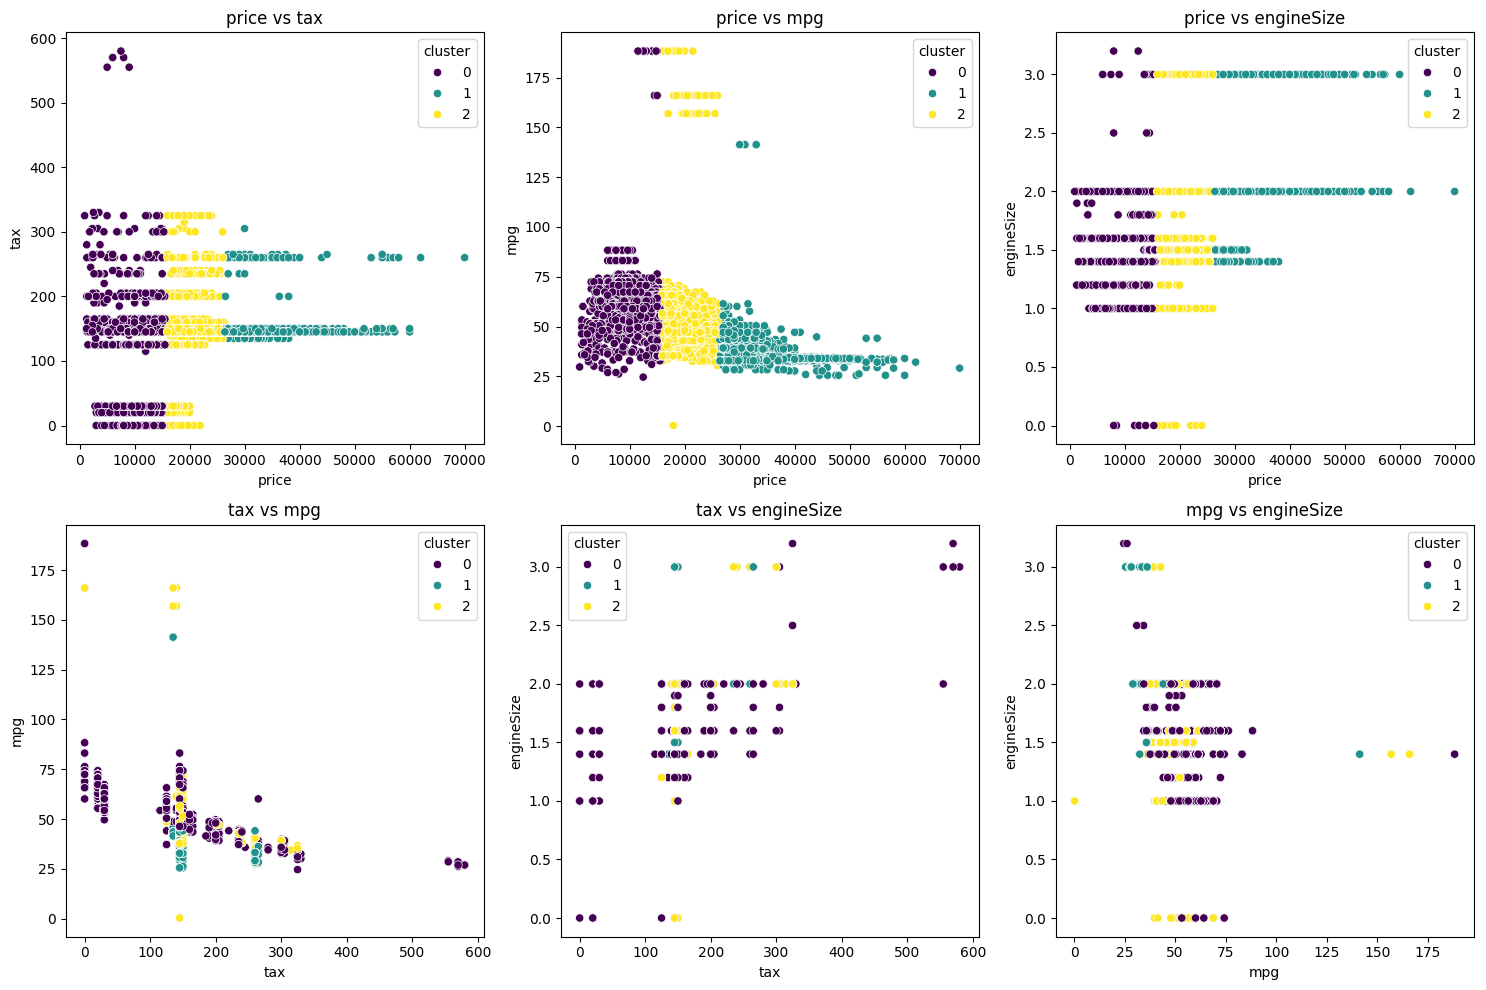

In [89]:
import itertools

combined_df = pd.DataFrame(data)

features_for_clustering = ['price', 'tax', 'mpg', 'engineSize']
X_cluster = combined_df[features_for_clustering]
kmeans = KMeans(n_clusters=3, random_state=42)
combined_df['cluster'] = kmeans.fit_predict(X_cluster)

feature_combinations = list(itertools.combinations(features_for_clustering, 2))

plt.figure(figsize=(15, 10))
for i, feature_combination in enumerate(feature_combinations, start=1):
    plt.subplot(2, 3, i)
    feature1, feature2 = feature_combination
    sns.scatterplot(data=combined_df, x=feature1, y=feature2, hue='cluster', palette='viridis', legend='full')
    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
plt.tight_layout()
plt.show()


<h5>Normalisation</h5>
In order to compare variables you will need to normalise them. Choose an appropriate
normalisation.

In [105]:
from sklearn.preprocessing import StandardScaler

features_for_normalization = ['price', 'tax', 'mpg', 'engineSize']

scaler = StandardScaler()
data[features_for_normalization] = scaler.fit_transform(data[features_for_normalization])

print("Normalized Data --------------------------")
print(data)

Normalized Data --------------------------
        model  year     price transmission  mileage fuelType       tax  \
0       T-Roc  2019  1.052392    Automatic  13904.0   Diesel  0.467039   
1       T-Roc  2019  1.295211    Automatic   4562.0   Diesel  0.467039   
2       T-Roc  2019  0.407627       Manual   7414.0   Diesel  0.467039   
3       T-Roc  2019  2.147462    Automatic   4825.0   Petrol  0.467039   
4       T-Roc  2019  0.781591    Semi-Auto   6500.0   Petrol  0.551375   
...       ...   ...       ...          ...      ...      ...       ...   
15152     Eos  2012 -1.399006       Manual  74000.0   Diesel  0.129696   
15153     Fox  2008 -1.939448       Manual  88102.0   Petrol  0.467039   
15154     Fox  2009 -1.966399       Manual  70000.0   Petrol  1.394731   
15155     Fox  2006 -2.010243       Manual  82704.0   Petrol  0.551375   
15156     Fox  2007 -1.875487       Manual  74000.0   Petrol  0.467039   

            mpg  engineSize  
0     -0.304459    0.866642  
1     -0

<h5>Weighting and Aggregation</h5>


Ranking of VW Models based on Composite Indicator:
model
 California         2.199025
 Touareg            2.130472
 Amarok             1.910781
 Caravelle          1.253160
 Arteon             0.733852
 Tiguan Allspace    0.709786
 Shuttle            0.658649
 Tiguan             0.534646
 Caddy Maxi Life    0.529017
 Sharan             0.515320
 Caddy Life         0.489872
 Caddy              0.411694
 Passat             0.247114
 T-Roc              0.236688
 CC                 0.140704
 Scirocco           0.134410
 Eos                0.086146
 Golf               0.083197
 Touran             0.079494
 Caddy Maxi         0.065377
 Jetta             -0.017773
 Golf SV           -0.108549
 Beetle            -0.208160
 T-Cross           -0.327697
 Polo              -0.725658
 Fox               -0.949203
 Up                -1.008664
dtype: float64


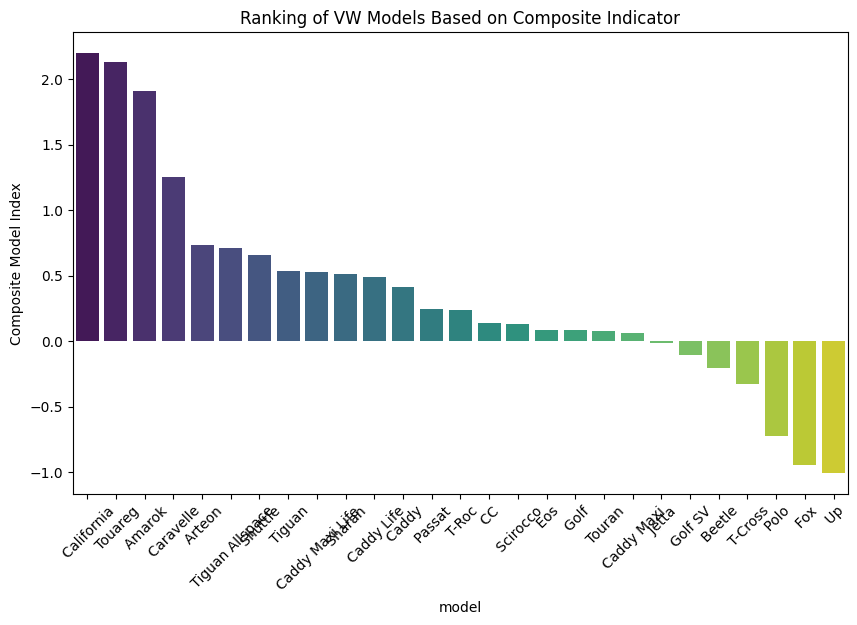

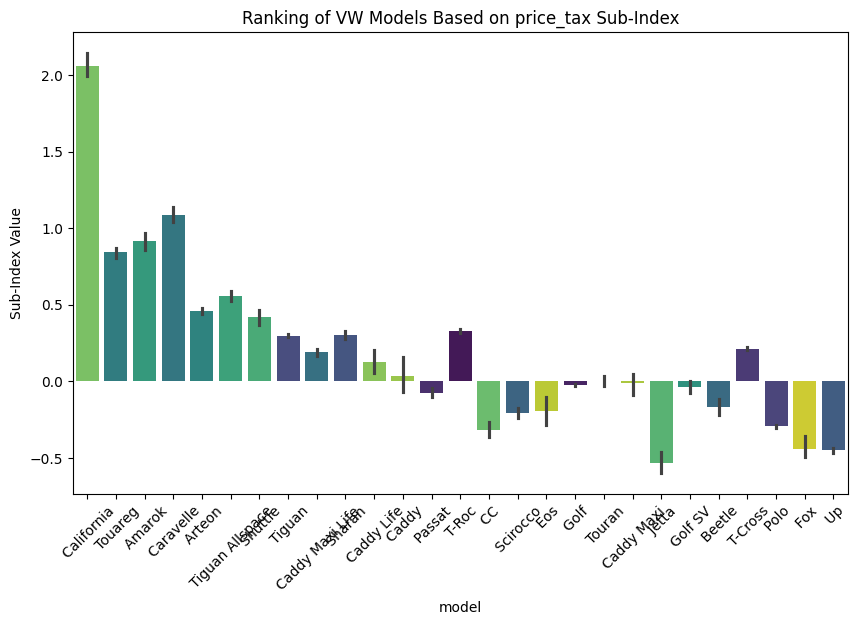

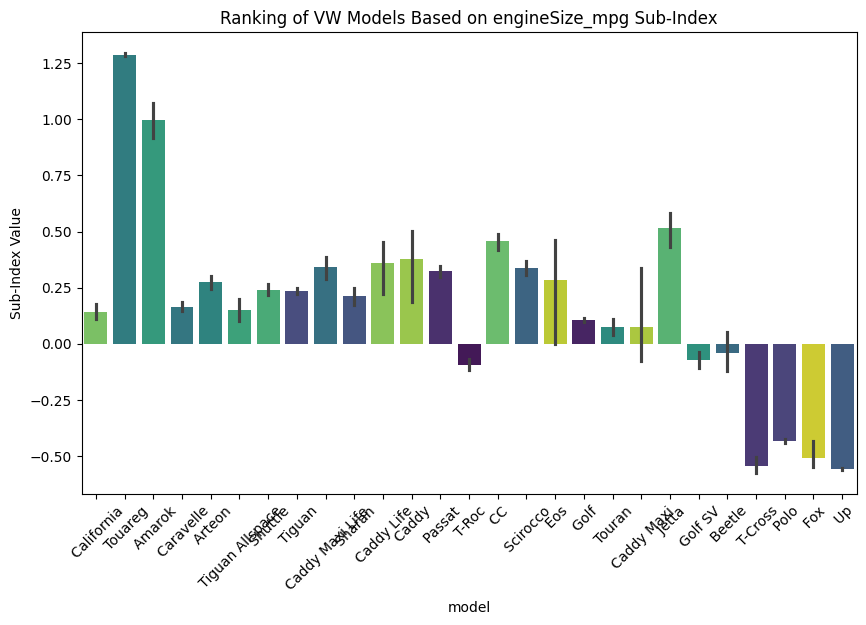

In [106]:
combined_df = pd.DataFrame(data)

weights = {
    'price_tax': {'price': 0.3, 'tax': 0.2},
    'engineSize_mpg': {'engineSize': 0.5, 'mpg': 0.2}
}

for indicator, sub_features in indicators.items():
    weighted_average = sum(combined_df[feature] * weights[indicator][feature] for feature in sub_features)
    combined_df[indicator] = weighted_average

model_rankings = combined_df.groupby('model')[['price_tax', 'engineSize_mpg']].mean().sum(axis=1).sort_values(ascending=False)
print("Ranking of VW Models based on Composite Indicator:")
print(model_rankings)

plt.figure(figsize=(10, 6))
sns.barplot(x=model_rankings.index, y=model_rankings.values, palette="viridis", hue=model_rankings.index, order=model_rankings.index)
plt.xticks(rotation=45)
plt.ylabel('Composite Model Index')
plt.title('Ranking of VW Models Based on Composite Indicator')
plt.show()

for indicator in weights.keys():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='model', y=indicator, data=combined_df, palette="viridis", hue='model', order=model_rankings.index, legend=False)
    plt.xticks(rotation=45)
    plt.ylabel('Sub-Index Value')
    plt.title(f'Ranking of VW Models Based on {indicator} Sub-Index')
    plt.show()